# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

1) сalls — количество звонков

2) minutes — суммарная длительность звонков в минутах

3) messages — количество sms-сообщений

4) mb_used — израсходованный интернет-трафик в Мб

5) is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Text(0, 0.5, 'Количество клиентов')

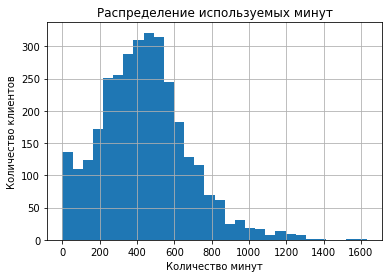

In [5]:
df['minutes'].hist(bins = 30)
plt.title('Распределение используемых минут')
plt.xlabel("Количество минут")
plt.ylabel("Количество клиентов")

Text(0, 0.5, 'Количество клиентов')

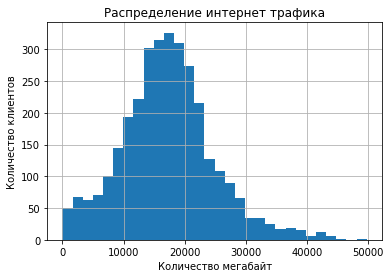

In [6]:
df['mb_used'].hist(bins = 30)
plt.title('Распределение интернет трафика')
plt.xlabel("Количество мегабайт")
plt.ylabel("Количество клиентов")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbde61dd10>,
      dtype=object)

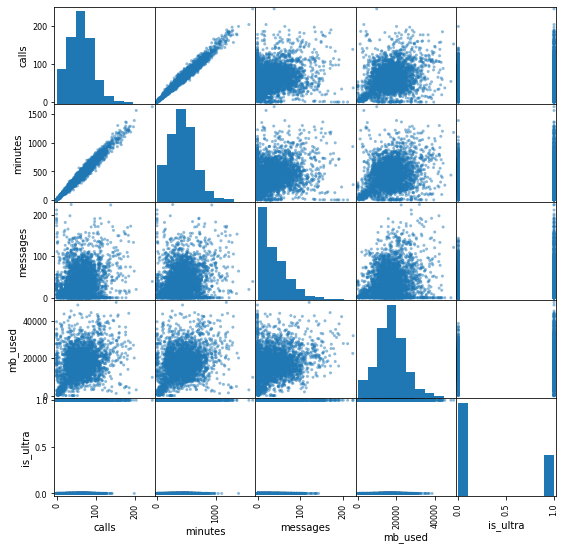

In [7]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))

Поскольку между звонками и минутами есть ярко выраженная кореляция, для того чтобы облегчить модели задачу можем убрать один из столбцов, и поскольку наш тариф ограничивается в минутах а не в количестве звонков, то количество звонков можно убрать.

In [8]:
df = df.drop('calls', axis = 1)

Все данные на месте, распределены в целом нормально, высокие и нулевые значения вполне объяснимы тем что некоторые пользователи не пользуются некоторыми услугами связи, а некоторые тратят много трафика. В принципе ни в 50 гб интернета, ни в 27 часах разговора по телефону за месяц, не вижу ничего аномального. Задача ясна, лишний столбец удален, поехали к выборкам.

## Разбейте данные на выборки

Разделим таблицу на признаки и цели, а потом разделим их на обучающую, валидационную и тестовую выборки в соотношении 60%, 20%, 20%.

In [9]:
features = df.drop('is_ultra', axis = 1)

In [10]:
target = df['is_ultra']

In [11]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, 
                                                                target, test_size = 0.2, random_state=12345, stratify = target)

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, 
                                       target_train_valid, test_size = 0.25, random_state=12345, stratify = target_train_valid)

## Исследуйте модели

Теперь перед нами стоит задача обучить модель классификации, у нас есть три варианта 1) древо выбора, 2) лес деревьев, 3) Логистическая регрессия. Давайте попробуем все три и выберем лучшую с лучшими параметрами, пока исходя из курса теории лучше всего себя показал лес деревьев.

In [13]:
for i in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth = i)
    model.fit(features_train, target_train)
    answer = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, answer)
    print('max_depth = {} : {}'.format(i, accuracy))

max_depth = 1 : 0.7589424572317263
max_depth = 2 : 0.7838258164852255
max_depth = 3 : 0.8040435458786936
max_depth = 4 : 0.8102643856920684
max_depth = 5 : 0.807153965785381
max_depth = 6 : 0.8009331259720062
max_depth = 7 : 0.8040435458786936
max_depth = 8 : 0.7993779160186625
max_depth = 9 : 0.8087091757387247
max_depth = 10 : 0.8118195956454122
max_depth = 11 : 0.8087091757387247
max_depth = 12 : 0.8102643856920684
max_depth = 13 : 0.807153965785381
max_depth = 14 : 0.8040435458786936
max_depth = 15 : 0.80248833592535
max_depth = 16 : 0.7884914463452566
max_depth = 17 : 0.7884914463452566
max_depth = 18 : 0.7729393468118196
max_depth = 19 : 0.7807153965785381


Лес деревьев

In [14]:
best_model_2 = None
best_accuracy = 0
best_est = 0
best_depth_2 = 0
for est in range(10, 51, 10):
    for depth_2 in range (1, 11):
        model_2 = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth_2)
        model_2.fit(features_train, target_train) 
        answer = model_2.predict(features_valid)
        accuracy_2 = accuracy_score(target_valid, answer)
        if best_accuracy < accuracy_2:
            best_model_2 = model_2
            best_accuracy = accuracy_2
            best_est = est
            best_depth_2 = depth_2
print("Высшая точность:", best_accuracy, "Количество деревьев:", best_est, "Максимальная глубина:", depth_2)

Высшая точность: 0.8227060653188181 Количество деревьев: 20 Максимальная глубина: 10


In [15]:
model_3 = LogisticRegression(random_state = 12345)
model_3.fit(features_train, target_train) 
accuracy_3 = model_3.score(features_valid, target_valid)
accuracy_3

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7045101088646968

Как и в теории, лучше всего себя показала модель с лесом деревьев с максимальным количеством ветвей. Но высока вероятность что модель с таким количеством ветвей переобучена. На примере модели с одним деревом мы видим что первая точка максимума достигается уже при 4 ветвях, поэтому попробуем взять 4 ветви и 20 деревьев, будем надеяться модель с такими параметрами покажет результат ощутимо лучше одного дерева, будет достаточно быстро давать ответ и не будет переобучена как наш большой лес.

In [16]:
final_model = RandomForestClassifier(random_state = 12345, n_estimators = 20, max_depth = 4)
final_model.fit(features_train, target_train) 
final_answer = final_model.predict(features_valid)
final_accuracy = accuracy_score(target_valid, final_answer)
final_accuracy

0.8164852255054432

Модель выбрана, давайте проверим ее на тестовой выборке.

## Проверьте модель на тестовой выборке

In [17]:
test = final_model.predict(features_test)
test_accuracy = accuracy_score(target_test, test)
test_accuracy

0.7962674961119751

In [18]:
final_model_plus = RandomForestClassifier(random_state = 12345, n_estimators = 20, max_depth = 4)
final_model_plus.fit(features_train_valid, target_train_valid)
test_plus = final_model_plus.predict(features_test)
test_accuracy_plus = accuracy_score(target_test, test_plus)
test_accuracy_plus

0.7978227060653188

И в результате у нас точность теста получилась почти как у валидационной выборки, так что считаю можно направлять модель на проверку. 

Также мы видим что добавление валидационной выборки к тренировочной почти не повлияло на точность, что говорит о том что тренировочная выборка вполне достаточна по размеру для качественного обучения модели.

## (бонус) Проверьте модели на адекватность

А можно ссылку где более понятно и доступно объясняют проверку модели на адекватность?
Интернет мне подсказал два варианта 1) С помощью критерия Фишера (понятное описание которого я не нашел) 2) по средним значениям отклика системы. Правильно понимаю что второй вариант подразумевает проверку модели через предсказание разных выборок которые можно получить изменением параметра random_state, и после этого сравнение среднего от этих предсказаний с нашим результатом? 

In [19]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

## Вывод:

В ходе работы над проектом мы испытали модели 1) Решающее дерево, 2) Лес деревьев, 3) Логистическая регрессия. По итогу нашего исследования мы подтвердили пройденную в теории информацию, что самую высокую точность предсказания из перечисленных показывает модель обученная "лесом деревьев". И в конце мы получили адекватную модель которая предсказывает тариф клиента с точностью почти 80% по результатам тестов, что является выполнением поставленной задачи.